# Parcial 1
Para el parcial 1 se desea crear un clasificador de partículas que arroje 1 para la partícula 1 y 0 para la partícula 2.

El primer paso es importar las librerias necesarias para solucionar este problema: 
* Pandas: Librería utilziada para el manejo de bases de datos y extracción de las caracteristicas de cada columna(media,varianza,maximos,minimos).
* numpy: Librería encargada del manejo de operaciones entre vectores y matrices.
* matplotlib: Librería utilizada para realizar analisís sobre graficas. 
* metrics: Módulo de la librería scikit-learn, este modulo permite hallar diversas medidas de evaluación de modelos 
* preprocessing: Módulo que permite realizar diferentes preprocesamientos a los datos
* SimpleImputer: Función que facilita el llenado de espacios en blanco, ceros o Nans en la base de datos de entrenamiento
* decomposition: Módulo utilizado para realizar el proceso de analisís de componentes principales

In [151]:
#importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.metrics import classification_report
import sklearn.metrics as mes
np.random.seed(3)
minn=0
maxn=0
std=0
mean=0

### Normalizar
<div class=text-justify>
La función normalizar permite normalizar una matriz X dada por parametro utilizando las variables minn y maxn declaradas en la celda anterior. Dado que se desea normalizar tanto el set de entrenamiento como el de test en función de los datos de entramiento, la variable minn es un vector que contiene los minimos de cada variable(columna) en el set de entrenamiento, y maxn es un vector que contiene los maximos de cada variable(columna) en el set de entrenamiento.

In [2]:
def normalizar(X):
    global minn,maxn
    """
    Parámetros de entrada:
    X -- Matriz de datos que se desea normalizar
    minn -- Vector con los minimos de las columnas del set de datos de entrenamiento
    maxn -- Vector con los maximos de las columnas del set de datos de entrenamiento
    
    Salidas:
    Xnorm -- Matriz X normalizada con el valor minimo y maximo de cada columna de la matriz de entrenamiento 
    """
    resta=maxn-minn
    Xnorm=(X-minn)/resta
    return Xnorm

### Estandarizar
<div class=text-justify>
La función estandarizar permite estandarizar una matriz X dada por parametro utilizando la media y la varizanda de la matriz que contiene los ejemplos utilizados durante el entrenamiento de la red. 

In [24]:
def estandarizar(X):
    global std,mean
    """
    Parámetros de entrada:
    X -- Matriz de datos que se desea estandarizar
    mean -- Vector con las medias de las columnas del set de datos de entrenamiento
    std -- Vector con las desviaciones estandar de las columnas del set de datos de entrenamiento
    
    Salidas:
    Xnorm -- Matriz X estandarizada, es decir, las columnas de la matriz Xnorm tienen media 0 y varianza 1 
    """
    
    Xnorm=(X-mean)/np.power(std,2)
    return Xnorm

# Preprocesing 

Esta función se encarga de preprocesar los datos de entrada utilizando el método introducido en el parámetro de entrada type. La función cuenta con los siguientes tipos de preprocesamiento: 

+ pca: Analisís de componentes principales de los datos de entrenamiento. Para mas información <https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA>
+ normalizar: Escalado de las columnas de las matriz de entrenamiento con el fin de dejar todos los valores de la matriz en una escala entre 0 y 1.
+ estandarizar: Escalado de las columnas de la matriz de entrenamiento con el fin de dejar todas las variables de la matriz con media 0 y varianza unitaria. 
+ robust: Escalado de los descriptores de la matriz de entrenamiento utilizando métodos estadisticos que son robustos frente a datos ruidosos ó "outliers". Para mas información <https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html>

In [25]:
def preprocesing(type='normalizar',whiten='False'):
    global minn,maxn,std,mean
    
    """
    Parámetros de entrada:
    type -- Tipo de presocesamiento que se le desea realizar a la base de datos
    whiten -- En caso de que el tipo de procesamiento seleccionado sea 'pca', indica si se debe realizar blanqueamiento a los datos 
    
    Salidas:
    Xtrain -- Matriz que contiene los datos de entrenamiento ya preprocesados
    Ytrain -- Etiquetas asignadas a cada uno de los ejemplos del set de entrenamiento
    Xcv -- Matriz que contiene los datos de validación ya preprocesados
    Ycv -- Etiquetas asignadas a cada uno de los ejemplos del set de validación 
    Xtest -- Matriz que contiene los datos de prueba
    Ytest -- Etiquetas asignadas a cada ejemplo en el set de prueba
    XtestT -- Matriz de datos de prueba que se utilizarán para calificar el modelo hallado
    pca -- En caso de que el tipo de preprocesamiento seleccionado sea 'pca', devuelve el objeto que contiene 
           todos los parámetros con los que se realizo el analisí de componentes principales
    """
    
    imp = SimpleImputer(missing_values=0.0, strategy='mean')
    XtrainT=pd.read_csv('xtrainCSV.csv',sep=";",header=None)
    XtrainT=pd.DataFrame(imp.fit_transform(XtrainT))
    
    YtrainT=pd.read_csv('ytrain.txt',header=None)
    XtestT=pd.read_csv('xtestCSV.csv',sep=";",header=None)
    nt= int(0.70*XtrainT.shape[0]) #numero de ejemplos de entreno
    ncv=int(0.15*XtrainT.shape[0]) #numero de ejemplos para el set de validación 
    
    Xtrain=XtrainT.sample(n=nt) #Datos de entrenamiento
    Ytrain=YtrainT.iloc[Xtrain.index,:]

    Xmed=XtrainT.drop(XtrainT.index[Xtrain.index])
    Ymed=YtrainT.drop(YtrainT.index[Xtrain.index])

    Xcv=Xmed.sample(n=ncv)
    Ycv=Ymed.loc[Xcv.index,:]
    
    Xmed=Xmed.drop(XtrainT.index[Xcv.index])
    Ymed=Ymed.drop(YtrainT.index[Xcv.index])

    Xtest=Xmed
    Ytest=Ymed
    
    pca=PCA(n_components=25,whiten=whiten)
    if type=='pca':
        pca.fit(Xtrain)
        Xtrain=pd.DataFrame(pca.transform(Xtrain))
        Xcv=pd.DataFrame(pca.transform(Xcv))
        Xtest=pd.DataFrame(pca.transform(Xtest))
        index1=pd.Index(range(Xtrain.shape[0]))
        Ytrain=Ytrain.set_index(index1)
        index2=pd.Index(range(Xcv.shape[0]))
        Ycv=Ycv.set_index(index2)
        index3=pd.Index(range(Xtest.shape[0]))
        Ytest=Ytest.set_index(index3)
        
        XtestT = pd.DataFrame(pca.transform(XtestT))
        
    elif type=='normalizar':
        minn=Xtrain.min(axis=0)
        maxn=Xtrain.max(axis=0)
        Xtrain=normalizar(Xtrain)
        Xcv=normalizar(Xcv)
        Xtest=normalizar(Xtest)
        
        XtestT=normalizar(XtestT)
        
    elif type=='estandarizar':
        std=Xtrain.std(axis=0)
        mean=Xtrain.mean(axis=0)
            
        Xtrain=estandarizar(Xtrain)
        Xcv=estandarizar(Xcv)
        Xtest=estandarizar(Xtest)
        
        XtestT=estandarizar(XtestT)
    
    elif type=='robust':
        transformer=RobustScaler().fit(Xtrain)
        Xtrain=pd.DataFrame(transformer.transform(Xtrain))
        Xcv=pd.DataFrame(transformer.transform(Xcv))
        Xtest=pd.DataFrame(transformer.transform(Xtest))
        XtestT=pd.DataFrame(transformer.transform(XtestT))
        index1=pd.Index(range(Xtrain.shape[0]))
        Ytrain=Ytrain.set_index(index1)
        index2=pd.Index(range(Xcv.shape[0]))
        Ycv=Ycv.set_index(index2)
        index3=pd.Index(range(Xtest.shape[0]))
        Ytest=Ytest.set_index(index3)

    return Xtrain,Ytrain,Xcv,Ycv,Xtest,Ytest,XtestT,pca

## Funciones que componen la red neuronal: 
<div class=text-justify>
    
A continuación, se presentan las funciones utilizadas para entrenar la red neuronal que creara el modelo de clasificación. Para esta implementación de una red neuronal, se agregaron nuevas variables de memoria llamadas ***caches*** que permiten guardar ciertos calculos realizados durante el proceso de forward-propagation que son de utilidad al momento de realizar back-prop. El uso de variables de memoria o ***caches***, optimiza el proceso de back-propagation al evitar recalcular variables ya utilizadas en forward-propagation, esto se ve reflejado en la eficiencia del algoritmo en cuanto a lo que a tiempo de procesamiento se refiere. 

### activation_function: 
Esta función se encarga de retornar la activación de una  neurona dada su función de ***pre-activación=Z*** y la función de activación a utilizar.

In [26]:
def activation_function(Z,activation):
    """
    Parámetros de entrada:
    Z -- Matriz con las salidas pre-activación de la capa actual
    activation -- función de activación seleccionada 
    
    Salidas:
    A -- Matriz con las activaciones de la capa actual
    cache -- Datos almacenados para mejorar la eficiencia de backpropagation 
    """
    cache=Z
    if activation=='sigmoid':
        A= 1/(1+np.exp(-Z))
    elif activation=='relu':
        A=(Z>0)*Z
    elif activation=='tanh':
        Z=(3/2)*Z
        A = 1.7159*(np.exp(Z)-np.exp(-Z))/(np.exp(Z)+np.exp(-Z))
    return (A,cache)

### initialize_parameters_deep: 

Función encargada de inicializar los pesos ***W*** y biases ***b*** de cada neurona en cada capa de la red.
Los pesos se inicializan de manera aleatoria con valores entre 0 y 1, mientras que los biases se inicializan en zero.

In [27]:
def initialize_parameters_deep(layer_dims):
    """
    Parámetros de entrada:
    layer_dims -- arreglo que contiene las dimensiones de cada capa de la red neuronal
    
    Salidas:
    parameters -- Diccionario de python que contiene los parametros de cada capa "W1", "b1", ..., "WL", "bL":
                    Wl -- matriz de pesos de la capa l con dimensiones (layer_dims[l], layer_dims[l-1])
                    bl -- vector bias de la capa l con dimensiones (layer_dims[l], 1)
    """
    parameters = {}
    L = len(layer_dims)            # Numero de capas en la red

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

### initialize_parameters_adam: 

Proceso de inicialización del vector ***v*** que contiene el promedio móvil de los gradientes de la red, o en otras palabras, el primer momento. Así mismo, se inicializa el vector ***s*** que contiene el promedio móvil de los gradientes cuadrados de lared, o en otras palabras, el segundo momento.

In [28]:
def initialize_adam(parameters) :
    """
    Parámetros de entrada:
    
    parameters -- Diccionario de python que contiene los pesos y biases de todas las capas de la red.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Salidas: 
    v -- Diccionario que contiene la media movil exponencial de los gradientes de la red
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- Diccionario que contiene la media movil exponencial de los gradientes al cuadrado de la red.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters['W'+str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters['b'+str(l+1)].shape)
    
    return v, s

### linear_forward:

Dadas las activaciones de las neuronas en la capa anterior, los pesos ***W*** y los biases ***b*** de la capa actual, la función ***linear_forward*** calcula las pre-activaciones de la capa actual (***Z***).

In [29]:
def linear_forward(A, W, b):
    """
    Parámetros de entrada:
    A -- Activaciones de la capa anterior
    W -- Matriz de pesos de la capa actual
    b -- Vector bias de la capa actual

    Salidas:
    Z -- función de pre-activación (f(Z)=A) 
    cache -- Tupla de python que almacena los valores de "A", "W" y "b" ; Guardados con el fin de hacer backpropagation más eficiente
    """
    

    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

### linear_activation_forward: 
Utilizando la función ***linear_forward*** esta función es capaz de calcular las activaciones de las neuronas en la capa actual.

In [30]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Parámetros de entrada:
    A_prev -- Activaciones de la capa anterior
    W -- Matriz de pesos de la capa actual
    b -- Vector bias de la capa actual
    activation -- función de activación utilizada en esta capa

    Salidas:
    A -- Activación de la capa actual  
    cache -- Tupla de python que almacena "linear_cache" y "activation_cache";
             alamacenadas para hacer backpropagation más eficiente
    """
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = activation_function(Z,'sigmoid')
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = activation_function(Z,'relu')
    elif activation == "tanh":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = activation_function(Z,'tanh')
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

### L-model-forward:

L-model-forward utiliza la función ***linear_activation_forward*** para calcular las activaciones de todas las neuronas en todas las capas de la red. 

In [31]:
def L_model_forward(X, parameters,keep_prob,act_function1='relu',act_function2='sigmoid'):
    """
    Parámetros de entrada:
    X -- Datos de entrada
    parameters -- parametros de la red (inicializados de manera aleatoria)
    keep_prob -- probabilidad de dejar una neurona viva (utilizado en Dropout)
    
    Salidas:
    AL -- Activación de la capa de salida
    caches -- Lista de caches que contiene:
                cada cache almacenado en linear_activation_forward() para cada capa de la red 
    """

    caches = []
    A = X
    L = len(parameters) // 2 # Numero de capas de la red
    
    for l in range(1, L):
        A_prev = A
        if l!=1:
            D = np.random.rand(A_prev.shape[0],A_prev.shape[1])                               
            D = D<=keep_prob                                         
            A_prev = A_prev*D                                       
            A_prev = A_prev/keep_prob
        A, cache = linear_activation_forward(A_prev,parameters['W' + str(l)],parameters['b' + str(l)],act_function1)
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)],parameters['b' + str(L)],act_function2)
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

### stretch_vector: 
Función auxiliar utilizada por ***compute_cost*** para poder calcular el valor de la regularización L2. ***stretch_vector*** recibe todos los parametros de la red (***W***,***b***) y devuelve un vector con todos los pesos y un vector con todos los bias de la red. 

In [32]:
def stretch_vector(parameters):
    
    """
    Parámetros de entrada: 
    parameters -- parametros de la red
    
    Salidas: 
    
    parameters_vectorW -- Arreglo de una dimensión con todos los pesos de la red  
    parameters_vectorB -- Arreglo de una dimensión con todos los biases de la red
    """
    L = len(parameters) // 2
    parameters_vectorW=np.array(np.squeeze(parameters['W'+str(L)]),ndmin=2)
    parameters_vectorb=np.array(np.squeeze(parameters['b'+str(L)]),ndmin=2)
    for l in range(L-1):
        parameters_vectorW=np.concatenate((parameters_vectorW,np.array(np.squeeze(parameters['W'+str(l+1)]),ndmin=2)),axis=None)
        parameters_vectorb=np.concatenate((parameters_vectorb,np.array(np.squeeze(parameters['b'+str(l+1)]),ndmin=2)),axis=None)
    return (parameters_vectorW,parameters_vectorb)

### compute_cost:
Cálculo de la función de costo utilizada, en este caso se utilizó la función de entropía cruzada más el termino de regularización L2. Donde el termino de regularización es la suma sobre todas las capas de cada uno de los pesos de la red.

$$ J(X,Y,w)= 
-\sum_{i=1}^{n}y_{i}Log(\sigma(X,w))+(1-y_{i})Log(1-\sigma(X,w))+\frac{\lambda}{2m}\sum_{i=1}^{L}\sum_{j=1}^{m}\sum_{k=1}^{n}W_{j,k}
$$ 

In [33]:
def compute_cost(AL, Y, lambd,parameters):
    """
    Parámetros de entrada:
    AL -- Activaciones de la capa de salida
    Y -- Vector de entrada con la clasificación real de cada ejemplo utilizado en el entrenamiento
    
    Salidas:
    cost -- Valor de la función de costo para el modelo actual, para este caso la función de costo es la función de entropía cruzada
    """
    
    m = Y.shape[1]
    parameters_vectorW,parameters_vectorb=stretch_vector(parameters)
    regularization_term=np.sum(np.square(parameters_vectorW))+np.sum(np.square(parameters_vectorb))
    AL[AL==1]=0.9999999999999
    AL[AL==0]=0.0000000000001
    cost = (-1/m)*(np.dot(Y,np.transpose(np.log(AL)))+np.dot(np.ones((Y.shape))-Y,np.transpose(np.log(np.ones((Y.shape))-AL))))+(lambd/(2*m))*regularization_term
    cost = np.squeeze(cost) 
    assert(cost.shape == ())
    
    return cost

### linear_backward:
Cálculo de la derivada de la función de costo con respecto a las activaciones de la capa anterior.

In [34]:
def linear_backward(dZ, cache):
    """
    Parámetros de entrada:
    dZ -- Gradiente de la función de costo con respecto a la salida pre-activación de las neuronas en la capa actual
    cache -- Tupla con (A_prev, W, b) valores guardados durante la ejecución de forwardpropagation 

    Salidas:
    dA_prev -- Gradiente de la función de costo con respecto a las activaciones de las neuronas en la capa anterior (of the previous layer l-1)
    dW -- Gradiente de la función de costo con respecto a los pesos de las capas
    db -- Gradiente de la función de costo con respecto a los biases de las neuronas en la capa actual
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*(np.dot(dZ,np.transpose(A_prev)))
    db = (1/m)*(np.sum(dZ,axis=1,keepdims=True))
    dA_prev = np.dot(np.transpose(W),dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

### linear_activation_backward: 
Haciendo uso de la función ***linear_backward*** y de la derivada de la función de costo con respecto a las activaciones de la capa actual, calcula la derivada de la función de costo con respecto a las activaciones de la capa anterior.

In [35]:
def linear_activation_backward(dA, cache, activation):
    """
    Parámetros de entrada:
    dA -- Gradiente de la función de costo con respecto a las activaciones de la capa actual 
    cache -- Tupla con (linear_cache, activation_cache), guardados durante forwardpropagation
    activation -- Función de activación utilizada en esta capa
    
    Salidas:
    dA_prev -- Gradiente de la función de costo con respecto a las activaciones de la capa anterior
    dW -- Gradiente de la función de costo con respecto a los pesos
    db -- Gradiente de la función de costo con respecto a los biases
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        rel,cc=activation_function(activation_cache,'relu')
        dZ = dA*(rel>=0)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        sig,cc=activation_function(activation_cache,'sigmoid')
        dZ = dA*(sig*(1-sig))
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    elif activation == "tanh":
        sig,cc=activation_function(activation_cache,'tanh')
        dZ = dA*(sig*(1-sig))
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

### L_model_backward: 
Cálculo de back-propagation para la red neuronal.

In [36]:
def L_model_backward(AL, Y, caches,act_function1,act_function2):
    """
    Parámetros de entrada:
    AL -- Activaciones de la capa de salida
    Y -- Vector de entrada con la clasificación real de cada ejemplo en el set de datos
    
    Salidas:
    grads -- Dictionario con los gradientes de todas las capas
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) 
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    dAL = -(np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) 
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,act_function2)
    
    for l in reversed(range(L-1)):
    
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)],current_cache,act_function1)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

### update_parameters: 
Actualización de parametros utilizando descenso de gradiente estocástico ó adam.

In [37]:
def update_parameters(parameters, grads, learning_rate,lambd,algorithm,t=0):
    """
    Parámetros de entrada:
    parameters -- Diccionario con los parámetros de la red 
    grads -- Diccionario con los gradientes de todas las capas
    
    Salidas:
    parameters -- Diccionario con todos los parámetros de la red actualizados
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    W1=parameters['W'+str(1)]
    m=W1.shape[0]
    L = len(parameters) // 2 
    
    if algorithm == 'sgd':
        for l in range(L):
            regularization_termW= parameters['W'+str(l+1)]
            regularization_termb=parameters['b'+str(l+1)]
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l + 1)]+(lambd/m)*regularization_termW
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l + 1)]+(lambd/m)*regularization_termb
    elif algorithm == 'adam':
        v, s = initialize_adam(parameters)
        parameters,v_,s_=update_parameters_with_adam(parameters,grads,v,s,t,lambd,learning_rate=learning_rate)
    return parameters

### update_parameters_with_adam
Función utilizada para actualizar los pesos de la red utilizando el algoritmo adam.A continuación se presentan las fórmulas utilizadas en la implementación de adam:
$$\begin{cases}
v_{W^{[l]}} = \beta_1 v_{W^{[l]}} + (1 - \beta_1) \frac{\partial J }{ \partial W^{[l]} } \\
v^{corrected}_{W^{[l]}} = \frac{v_{W^{[l]}}}{1 - (\beta_1)^t} \\
s_{W^{[l]}} = \beta_2 s_{W^{[l]}} + (1 - \beta_2) (\frac{\partial J }{\partial W^{[l]} })^2 \\
s^{corrected}_{W^{[l]}} = \frac{s_{W^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{W^{[l]}}}{\sqrt{s^{corrected}_{W^{[l]}}}+\varepsilon}
\end{cases}$$

Donde $v_{W^{[l]}}$ es el promedio móvil del gradiente (primer momento), y $s_{W^{[l]}}$ es el promedio móvil del gradiente al cuadrado (segundo momento).

In [38]:
def update_parameters_with_adam(parameters, grads, v, s, t,lambd, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    
    Parámetros de entrada:
    parameters -- Diccionario con los pesos de la red:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- Diccionario con los gradientes de cada capa de la red:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Variable del algoritmo Adam, promedio movil de los gradientes de la red (primer momento)
    s -- Variable del algoritmo Adam, promedio movil de los gradientes al cuadrado de la red (segundo momento)
    learning_rate -- tasa de aprendizaje.
    beta1 -- Hyperparámetro asociado al decrecimiento exponencial de la estimación del primer momento 
    beta2 -- Hyperparámetro asociado al decrecimiento exponencial de la estimación del segundo momento
    epsilon -- Hyperparámetro que previene división por cero en las actualizaciones de los pesos de la red

    Salidas:
    parameters -- Diccionario con los parametros de la red actualizados 
    v -- Promedio movil de la estimación del primer momento
    s -- Promedio movil de la estimación del segundo momento
    """
    W1=parameters['W'+str(1)]
    L = len(parameters) // 2                 
    v_corrected = {}                         
    s_corrected = {}                         
    m=W1.shape[0]
    

    for l in range(L):
        regularization_termW= parameters['W'+str(l+1)]
        regularization_termb=parameters['b'+str(l+1)]

        v["dW" + str(l+1)] = beta1*v['dW'+str(l+1)]+(1-beta1)*grads['dW'+str(l+1)]
        v["db" + str(l+1)] = beta1*v['db'+str(l+1)]+(1-beta1)*grads['db'+str(l+1)]

        v_corrected["dW" + str(l+1)] = v['dW'+str(l+1)]/(1-np.power(beta1,t))
        v_corrected['db'+str(l+1)] = v['db'+str(l+1)]/(1-np.power(beta1,t))

        s["dW" + str(l+1)] = beta2*s['dW'+str(l+1)]+(1-beta2)*np.power(grads['dW'+str(l+1)],2)
        s["db" + str(l+1)] = beta2*s['db'+str(l+1)]+(1-beta2)*np.power(grads['db'+str(l+1)],2)

        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-np.power(beta2,t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-np.power(beta2,t))

        parameters["W" + str(l+1)] = parameters['W'+str(l+1)]-learning_rate*(v_corrected['dW'+str(l+1)]/(np.sqrt(s_corrected['dW'+str(l+1)])+epsilon))+(lambd/m)*regularization_termW
        parameters["b" + str(l+1)] = parameters['b'+str(l+1)]-learning_rate*(v_corrected['db'+str(l+1)]/(np.sqrt(s_corrected['db'+str(l+1)])+epsilon))+(lambd/m)*regularization_termb
        

    return parameters, v, s

### L_layer_model:
Función que calcula los pesos "óptimos" de la red neuronal. 

In [39]:
def L_layer_model(Xt, Yt, layers_dims, learning_rate = 0.0075,learning_rate_type='constant', num_epochs = 100, print_cost=False, lambd=0.001,keep_prob=0.5,act_function1='relu',act_function2='sigmoid',Opt_algorithm='sgd',decay_rate=0.5):#lr was 0.009
    """
    Parámetros de entrada:
    Xt -- Datos de entrenamiento
    Yt -- Vector de entrada con la clasificación real de cada ejemplo utilizado en el entrenamiento
    layers_dims -- Lista con las dimensiones de cada capa de la red.
    learning_rate -- Tasa de aprendizaje
    learning_rate_type -- Tipo de tasa de aprendizaje utilizada. Puede ser constante con el valor de learning rate ó variable
                          siguiendo la formula learning_rate*(1/(1+decay_rate**(#epocasRealizadas)))
    Opt_algorithm -- Algoritmo de optimización a utilizar para el proceso de entrenamiento. Puede ser 'sgd' descenso de gradiente estocastico
                     ó 'adam'
    decay_rate -- tasa de decaimiento utilizada para tasas de aprendizaje variables con respecto al número de epocas
    act_function1 -- Función de activación utilizada para las capas escondidas
    act_function2 -- Función de activación utilizada para la capa de salida
    num_epochs -- Numero de epocas a realizar por el algoritmo de optimización 
    print_cost -- Si es verdadero, se imprime en consola el valor de la función de costo cada 100 iteracioens
    lambd -- parámetro de regularización. Utilizado para regularización L2
    keep_prob -- probabilidad de que una neurona viva. Utilizado para regularización con Dropout
    
    Salidas:
    parameters -- parámetros aprendidos por el modelo. 
    """
    costs = []                         
    parameters = initialize_parameters_deep(layers_dims)
    batch_size=4096
    epoch=Xt.shape[0]//batch_size
    n_epochs=num_epochs*epoch
    for i in range(0, n_epochs):
        X=Xt.sample(n=batch_size)
        Y=Yt.loc[X.index,0]
        X=np.transpose(np.array(X,ndmin=2))
        Y=np.array(Y,ndmin=2)
        
        AL, caches = L_model_forward(X,parameters,keep_prob,act_function1,act_function2)
        
        cost = compute_cost(AL,Y,lambd,parameters)
    
        grads = L_model_backward(AL,Y,caches,act_function1,act_function2)
        
        if learning_rate_type=='invscaling':
            lr_decay=learning_rate/(1+decay_rate*(i//epoch))
        elif learning_rate_type=='constant':
            lr_decay=learning_rate
        parameters = update_parameters(parameters,grads,lr_decay,lambd,Opt_algorithm,t=(i+1))
        
        if print_cost and i % (5*epoch) == 0:
            print ("Cost after epoch %i: %f" %(i//epoch, cost))
        if print_cost and i % (5*epoch) == 0:
            costs.append(cost)
        
    if print_cost:        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
    return parameters

La siguiente línea permite cargar todos los set de datos necesariós para la creación y analisís de los diferentes modelos creados por las redes neuronales. 

In [40]:
Xtrainw,Ytrainw,Xcvw,Ycvw,Xtestw,Ytestw,XtestT,pca=preprocesing(type='robust')

## Selección de modelo y sintonización de hiperparámetros 

Se decidió sintonizar los parametros en el siguiente orden de importancia: 

+ tasa de aprendizaje 
+ Numero de neuronas y capas
+ Regularización: $\lambda$ y keep_prob
+ Umbral de selección h

### Proceso de selección para el parámetro $\alpha$ o tasa de aprendizaje: 

Con el fin de seleccionar la mejor tasa de aprendizaje para el problema planteado, se decidío probrar con tasas de aprendizaje variable(que decaen en función del numero de epocas pasadas) y con tasas de aprendizaje constantes. A continuación se presentan los modelos de selección para cada una de ellas. 

#### Tasa de aprendizaje constante: 
Para seleccionar la mejor tasa de aprendizaje constante se realizarón dos barridos de posibles valores. El primero fue un barrido en escala logarítmica desde $10^{-10}$ hasta $10^{-3}$ para escoger un buen rango de la variable, allí se encontró que el mejor valor de $\alpha$ para ese rango de valores era $10^{-3}$. Luego, se hizo un barrido para valores cercanos a $10^{-3}$ se tomaron los siguientes valores para el barrido:

$$
[1*10^{-4},1*10^{-3},1.5*10^{-3},2*10^{-3},3*10^{-3},6*10{-3},7.5*10{-3},9*10{-3},1*10^{-2}]  
$$

Seguidamente, se calculo el numero de aciertos en el set de validación y se seleccióno el modelo con el porcentaje de aciertos mas alto.  

In [41]:
#selección learning rate
layer_dims=[Xtrainw.shape[1],50,1]
h=0.4
Xcv=np.transpose(np.array(Xcvw))
Xtrain=np.transpose(np.array(Xtrainw))
Ycv=Ycvw
Ytrain=Ytrainw
#pasoslr=[pow(10,-3),pow(10,-4),pow(10,-5),pow(10,-6),pow(10,-7),pow(10,-8),pow(10,-9),pow(10,-10)]
pasoslr=[pow(10,-4),pow(10,-3),1.5*pow(10,-3),2*pow(10,-3),3*pow(10,-3),6*pow(10,-3),7.5*pow(10,-3),9*pow(10,-3),pow(10,-2)]
MejorAlphaConstante=0
MejorDecayRate=0
CalificacionesCVCte=[0]
CalificacionesTrainCte=[0]
for alpha in pasoslr:
    
    parameters=L_layer_model(Xtrainw,Ytrainw,layer_dims,print_cost=False,num_epochs=850,keep_prob=1,lambd=0,learning_rate=alpha,Opt_algorithm='adam')
    
    outCV,cache=L_model_forward(Xcv,parameters,keep_prob=1)
    outTrain,cache=L_model_forward(Xtrain,parameters,keep_prob=1)
    
    predictCV=(outCV>h)*1
    predictCV=np.transpose(predictCV)
    scoreCV=mes.accuracy_score(Ycv,predictCV)
    
    predictTrain=(outTrain>h)*1
    predictTrain=np.transpose(predictTrain)
    scoreTrain=mes.accuracy_score(Ytrain,predictTrain)
    
    if scoreCV>max(CalificacionesCVCte):
        MejorAlphaConstante=alpha
        
    CalificacionesCVCte.append(scoreCV)
    CalificacionesTrainCte.append(scoreTrain)
    print('Tasa de aprendizaje: ',alpha)

Tasa de aprendizaje:  0.0001
Tasa de aprendizaje:  0.001
Tasa de aprendizaje:  0.0015
Tasa de aprendizaje:  0.002
Tasa de aprendizaje:  0.003
Tasa de aprendizaje:  0.006
Tasa de aprendizaje:  0.0075
Tasa de aprendizaje:  0.009000000000000001
Tasa de aprendizaje:  0.01


Mejor valor de la tasa de aprendizaje obtenido:  0.0015
Mejor porcentaje de aciertos obtenido en el set de entrenamiento:  0.6287829588258216
Mejor porcentaje de aciertos obtenido en el set de validación:  0.6236363636363637


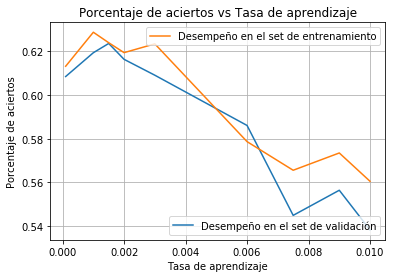

In [42]:
# plot
indice=pasoslr.index(MejorAlphaConstante)
print('Mejor valor de la tasa de aprendizaje obtenido: ',MejorAlphaConstante)
print('Mejor porcentaje de aciertos obtenido en el set de entrenamiento: ',max(CalificacionesTrainCte))
print('Mejor porcentaje de aciertos obtenido en el set de validación: ',max(CalificacionesCVCte))
validacion,=plt.plot(pasoslr,CalificacionesCVCte[1:len(CalificacionesCVCte)],label='Desempeño en el set de validación')
entreno,=plt.plot(pasoslr,CalificacionesTrainCte[1:len(CalificacionesTrainCte)],label='Desempeño en el set de entrenamiento')
plt.title('Porcentaje de aciertos vs Tasa de aprendizaje')
plt.xlabel('Tasa de aprendizaje')
plt.ylabel('Porcentaje de aciertos')
first_leg=plt.legend(handles=[entreno],loc='upper right')
ax=plt.gca().add_artist(first_leg)
plt.legend(handles=[validacion],loc='lower right')
plt.grid()
plt.show()

#### Tasa de aprendizaje variable:
<div class=text-justify>
Para escoger la mejor tasa de aprendizaje variable, lo ideal sería crear una grilla con todas las posibles combinaciones entre la tasa de aprendizaje y la tasa de decaimiento en un rango de valores apropiado, probarlos todos y utilizar la pareja con mejores resultados en el set de validación. Sin embargo, como dicho cálculo es computacionalmente muy costoso, se decidió establecer un rango de valores para cada una de las variables, y tomar parejas aleatorias y elegir la mejor de entre todas las parejas formadas. Con el fin de tomar una muestra significativa del total de parejas posibles, se tomo la decisión de evaluar cerca del 40% del total de las parejas factibles y escoger la mejor pareja del conjunto evaluado.  

In [43]:
#selección learning rate
layer_dims=[Xtrainw.shape[1],50,1]
h=0.4
Xcv=np.transpose(np.array(Xcvw))
Xtrain=np.transpose(np.array(Xtrainw))
Ycv=Ycvw
Ytrain=Ytrainw
pasosdr=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
pasoslr=[pow(10,-2),pow(10,-1),2*pow(10,-1),3*pow(10,-1),4*pow(10,-1),5*pow(10,-1),6*pow(10,-1),7*pow(10,-1),8*pow(10,-1)]
MejorAlphaVariable=0
MejorDecayRate=0
CalificacionesCV=[0]
CalificacionesTrain=[0]
for i in range(75):
    
    indicelr=np.random.randint(low=0,high=len(pasoslr))
    indicedr=np.random.randint(low=0,high=len(pasosdr))
    
    alpha=pasoslr[indicelr]
    decay_rate=pasosdr[indicedr]
    
    parameters=L_layer_model(Xtrainw,Ytrainw,layer_dims,print_cost=False,num_epochs=850,keep_prob=1,learning_rate_type='invscaling',lambd=0,learning_rate=alpha,decay_rate=decay_rate,Opt_algorithm='adam')
    
    outCV,cache=L_model_forward(Xcv,parameters,keep_prob=1)
    outTrain,cache=L_model_forward(Xtrain,parameters,keep_prob=1)
    
    predictCV=(outCV>h)*1
    predictCV=np.transpose(predictCV)
    scoreCV=mes.accuracy_score(Ycv,predictCV)
    
    predictTrain=(outTrain>h)*1
    predictTrain=np.transpose(predictTrain)
    scoreTrain=mes.accuracy_score(Ytrain,predictTrain)
    
    if scoreCV>max(CalificacionesCV):
        MejorAlphaVariable=alpha
        MejorDecayRate=decay_rate
        
    CalificacionesCV.append(scoreCV)
    CalificacionesTrain.append(scoreTrain)
    print('Iteracion: ',i)
    print('Tasa de aprendizaje: ',alpha,' Tasa de decaimiento: ',decay_rate)

Iteracion:  0
Tasa de aprendizaje:  0.4  Tasa de decaimiento:  0.2
Iteracion:  1
Tasa de aprendizaje:  0.1  Tasa de decaimiento:  0.4


C:\Users\AsusPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Iteracion:  2
Tasa de aprendizaje:  0.5  Tasa de decaimiento:  0
Iteracion:  3
Tasa de aprendizaje:  0.5  Tasa de decaimiento:  0.4
Iteracion:  4
Tasa de aprendizaje:  0.6000000000000001  Tasa de decaimiento:  0.8
Iteracion:  5
Tasa de aprendizaje:  0.5  Tasa de decaimiento:  1
Iteracion:  6
Tasa de aprendizaje:  0.6000000000000001  Tasa de decaimiento:  0.8
Iteracion:  7
Tasa de aprendizaje:  0.2  Tasa de decaimiento:  1
Iteracion:  8
Tasa de aprendizaje:  0.7000000000000001  Tasa de decaimiento:  0.5
Iteracion:  9
Tasa de aprendizaje:  0.6000000000000001  Tasa de decaimiento:  1
Iteracion:  10
Tasa de aprendizaje:  0.01  Tasa de decaimiento:  0.5
Iteracion:  11
Tasa de aprendizaje:  0.01  Tasa de decaimiento:  0.5
Iteracion:  12
Tasa de aprendizaje:  0.8  Tasa de decaimiento:  0
Iteracion:  13
Tasa de aprendizaje:  0.4  Tasa de decaimiento:  0.6
Iteracion:  14
Tasa de aprendizaje:  0.30000000000000004  Tasa de decaimiento:  0.2
Iteracion:  15
Tasa de aprendizaje:  0.4  Tasa de decaim

In [44]:
# plot
indice=pasoslr.index(MejorAlphaVariable)
print('Mejor valor de la tasa de aprendizaje obtenido: ',MejorAlphaVariable)
print('Mejor valor de la tasa de decaimiento obtenida: ',MejorDecayRate)
print('Mejor porcentaje de aciertos obtenido en el set de entrenamiento: ',max(CalificacionesTrain))
print('Mejor porcentaje de aciertos obtenido en el set de validación: ',max(CalificacionesCV))

Mejor valor de la tasa de aprendizaje obtenido:  0.30000000000000004
Mejor valor de la tasa de decaimiento obtenida:  0.4
Mejor porcentaje de aciertos obtenido en el set de entrenamiento:  0.6394336926873619
Mejor porcentaje de aciertos obtenido en el set de validación:  0.6309090909090909


In [153]:
# Este bloque decide si es mejor utilizar una tasa variable o una tasa constante
diferencia=np.abs(max(CalificacionesCVCte)-max(CalificacionesCV))
if max(CalificacionesCVCte) > max(CalificacionesCV):
    MejorAlpha=MejorAlphaConstante
    learning_rate_type='constant'
    print('Es mejor utilizar una tasa de aprendizaje constante por una diferencia de: ',diferencia)
else: 
    MejorAlpha=MejorAlphaVariable
    learning_rate_type='invscaling'
    print('Es mejor utilizar una tasa de aprendizaje variable por una diferencia de: ',diferencia)

Es mejor utilizar una tasa de aprendizaje variable por una diferencia de:  0.023636363636363567


### dimensionesCapasEscondidas: 

Este función permite generar un arreglo con las dimensiones de las diferentes capas de la red en función de un número de neuronas y número de capas ingresados por parámetro. Esta función asume que todas las capas escondidas de la red tienen el mismo numero de neuronas.

In [46]:
def dimensionesCapasEscondidas(NumeroNeuronas,NumeroCapas):
    layers_dims=np.ones(NumeroCapas)*int(NumeroNeuronas)
    layers_dims=np.insert(layers_dims,[0,len(layers_dims)],[Xtrainw.shape[1],1])
    layers_dims=layers_dims.astype(int)
    return layers_dims.tolist()

### Proceso de selección para el número de neuronas y número de capas en la red

Con el fin de escoger el mejor número de neuronas y capas en la red, se utilizó las misma técnica que en el proceso de selección para la tasa de aprendizaje variable. Primero, se establecieron los posibles valores para las variables y se tomaron muestras aleatorias de entre el set de posibles combinaciones. Luego, se elige la mejor combinación de entre todo el set de muestras. 
    
Además, se decidió combinar este paso con el proceso de selección del método de regularización a utilizar, es decir, se agrego una tercera variable que en este casó es la probabilidad de que una neurona sobrevia en el método de Dropout ó el parámetro de regularización L2 $\lambda$. 

Dadó que el conjunto de posibles combinaciones es muy grande, se tomo la decisión de tomar 500 muestras y elegir la mejor combinación entre estas.

#### Selección del mejor número de neuronas, mejor número de capas escondidas y probabilidad de que una nuerona sobreviva en dropout

In [47]:
# selección kp, NumNeuronas y numero de capas
layer_dims=[Xtrainw.shape[1],50,1]
h=0.4
Xcv=np.transpose(np.array(Xcvw))
Xtrain=np.transpose(np.array(Xtrainw))
Ycv=Ycvw
Ytrain=Ytrainw
pasoskp=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
pasosNn=list(range(1,11))+list(range(11,31,3))
pasosNc=range(1,5)
Mejorkp=0
MejorNnKp=0
MejorNcKp=0
CalificacionesCVkp=[0]
CalificacionesTrainkp=[0]
for i in range(500):
    
    indicekp=np.random.randint(low=0,high=len(pasoskp))
    indiceNn=np.random.randint(low=0,high=len(pasosNn))
    indiceNc=np.random.randint(low=0,high=len(pasosNc))
    
    keep_prob=pasoskp[indicekp]
    NumNeuronas=pasosNn[indiceNn]
    NumCapas=pasosNc[indiceNc]
    
    layer_dims=dimensionesCapasEscondidas(NumNeuronas,NumCapas)
    parameters=L_layer_model(Xtrainw,Ytrainw,layer_dims,print_cost=False,num_epochs=850,keep_prob=keep_prob,lambd=0,learning_rate_type=learning_rate_type,learning_rate=MejorAlpha,decay_rate=MejorDecayRate,Opt_algorithm='adam')
    
    outCV,cache=L_model_forward(Xcv,parameters,keep_prob=1)
    outTrain,cache=L_model_forward(Xtrain,parameters,keep_prob=1)
    
    predictCV=(outCV>h)*1
    predictCV=np.transpose(predictCV)
    scoreCV=mes.accuracy_score(Ycv,predictCV)
    
    predictTrain=(outTrain>h)*1
    predictTrain=np.transpose(predictTrain)
    scoreTrain=mes.accuracy_score(Ytrain,predictTrain)
    
    if scoreCV>max(CalificacionesCVkp):
        Mejorkp=keep_prob
        MejorNnKp=NumNeuronas
        MejorNcKp=NumCapas
        
    CalificacionesCVkp.append(scoreCV)
    CalificacionesTrainkp.append(scoreTrain)
    
    if i % 10 == 0:
        print('Iteración: ',i,' Probabilidad de neurona viva: ',keep_prob,' Numero de neuronas: ',NumNeuronas,' Numero de capas: ',NumCapas)

Iteración:  0  Probabilidad de neurona viva:  0.2  Numero de neuronas:  7  Numero de capas:  1


C:\Users\AsusPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Iteración:  10  Probabilidad de neurona viva:  0.4  Numero de neuronas:  7  Numero de capas:  1
Iteración:  20  Probabilidad de neurona viva:  0.2  Numero de neuronas:  20  Numero de capas:  2
Iteración:  30  Probabilidad de neurona viva:  0.5  Numero de neuronas:  26  Numero de capas:  4
Iteración:  40  Probabilidad de neurona viva:  1  Numero de neuronas:  10  Numero de capas:  2
Iteración:  50  Probabilidad de neurona viva:  0.1  Numero de neuronas:  23  Numero de capas:  1
Iteración:  60  Probabilidad de neurona viva:  0.9  Numero de neuronas:  17  Numero de capas:  2
Iteración:  70  Probabilidad de neurona viva:  0.6  Numero de neuronas:  9  Numero de capas:  4
Iteración:  80  Probabilidad de neurona viva:  0.3  Numero de neuronas:  11  Numero de capas:  4
Iteración:  90  Probabilidad de neurona viva:  1  Numero de neuronas:  4  Numero de capas:  1
Iteración:  100  Probabilidad de neurona viva:  0.3  Numero de neuronas:  17  Numero de capas:  1
Iteración:  110  Probabilidad de neu

In [48]:
#plot 
print('Mejor valor de la probabilidad de que una neurona sobreviva en Dropout: ',Mejorkp)
print('Mejor numero de neuronas: ',MejorNnKp)
print('Mejor numero de capas: ', MejorNcKp)
print('Mejor porcentaje de aciertos obtenido en el set de entrenamiento: ',max(CalificacionesTrainkp))
print('Mejor porcentaje de aciertos obtenido en el set de validación: ',max(CalificacionesCVkp))

Mejor valor de la probabilidad de que una neurona sobreviva en Dropout:  0.3
Mejor numero de neuronas:  26
Mejor numero de capas:  1
Mejor porcentaje de aciertos obtenido en el set de entrenamiento:  0.6331991167684115
Mejor porcentaje de aciertos obtenido en el set de validación:  0.6351515151515151


#### Selección del mejor número de neuronas, mejor número de capas escondidas y  parámetro de regularización L2 

In [49]:
# selección lambda, NumNeuronas y numero de capas
layer_dims=[Xtrainw.shape[1],50,1]
h=0.4
Xcv=np.transpose(np.array(Xcvw))
Xtrain=np.transpose(np.array(Xtrainw))
Ycv=Ycvw
Ytrain=Ytrainw
pasosL2=[pow(10,-4),pow(10,-3),3*pow(10,-3),5*pow(10,-3),7.5*pow(10,-3),8.5*pow(10,-3),pow(10,-2)]
pasosNn=list(range(1,11))+list(range(11,31,5))
pasosNc=range(1,4)
MejorLambda=0
MejorNnL=0
MejorNcL=0
CalificacionesCVl2=[0]
CalificacionesTrainl2=[0]
for i in range(500):
    
    indicel2=np.random.randint(low=0,high=len(pasosL2))
    indiceNnL=np.random.randint(low=0,high=len(pasosNn))
    indiceNcL=np.random.randint(low=0,high=len(pasosNc))
    
    lambd=pasosL2[indicel2]
    NumNeuronas=pasosNn[indiceNnL]
    NumCapas=pasosNc[indiceNcL]
    
    layer_dims=dimensionesCapasEscondidas(NumNeuronas,NumCapas)
    parameters=L_layer_model(Xtrainw,Ytrainw,layer_dims,print_cost=False,num_epochs=850,keep_prob=1,learning_rate_type=learning_rate_type,lambd=lambd,learning_rate=MejorAlpha,decay_rate=MejorDecayRate,Opt_algorithm='adam')
    
    outCV,cache=L_model_forward(Xcv,parameters,keep_prob=1)
    outTrain,cache=L_model_forward(Xtrain,parameters,keep_prob=1)
    
    predictCV=(outCV>h)*1
    predictCV=np.transpose(predictCV)
    scoreCV=mes.accuracy_score(Ycv,predictCV)
    
    predictTrain=(outTrain>h)*1
    predictTrain=np.transpose(predictTrain)
    scoreTrain=mes.accuracy_score(Ytrain,predictTrain)
    
    if scoreCV>max(CalificacionesCVl2):
        MejorLambda=lambd
        MejorNnL=NumNeuronas
        MejorNcL=NumCapas
        
    CalificacionesCVl2.append(scoreCV)
    CalificacionesTrainl2.append(scoreTrain)
    
    if i % 10 == 0:
        print('Iteración: ',i,' Parámetro de regularización L2: ',lambd,' Numero de neuronas: ',NumNeuronas,' Numero de capas: ',NumCapas)

Iteración:  0  Parámetro de regularización L2:  0.005  Numero de neuronas:  5  Numero de capas:  1


C:\Users\AsusPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


Iteración:  10  Parámetro de regularización L2:  0.0075  Numero de neuronas:  8  Numero de capas:  2
Iteración:  20  Parámetro de regularización L2:  0.0085  Numero de neuronas:  7  Numero de capas:  3
Iteración:  30  Parámetro de regularización L2:  0.0001  Numero de neuronas:  6  Numero de capas:  1
Iteración:  40  Parámetro de regularización L2:  0.001  Numero de neuronas:  8  Numero de capas:  2
Iteración:  50  Parámetro de regularización L2:  0.003  Numero de neuronas:  21  Numero de capas:  3
Iteración:  60  Parámetro de regularización L2:  0.01  Numero de neuronas:  21  Numero de capas:  3
Iteración:  70  Parámetro de regularización L2:  0.005  Numero de neuronas:  16  Numero de capas:  3
Iteración:  80  Parámetro de regularización L2:  0.005  Numero de neuronas:  6  Numero de capas:  3
Iteración:  90  Parámetro de regularización L2:  0.005  Numero de neuronas:  4  Numero de capas:  2
Iteración:  100  Parámetro de regularización L2:  0.0075  Numero de neuronas:  5  Numero de cap

In [50]:
#plot 
print('Mejor valor de la parámetro de regularización hallado: ',MejorLambda)
print('Mejor numero de neuronas: ',MejorNnL)
print('Mejor numero de capas: ', MejorNcL)
print('Mejor porcentaje de aciertos obtenido en el set de entrenamiento: ',max(CalificacionesTrainl2))
print('Mejor porcentaje de aciertos obtenido en el set de validación: ',max(CalificacionesCVl2))

Mejor valor de la parámetro de regularización hallado:  0.01
Mejor numero de neuronas:  9
Mejor numero de capas:  1
Mejor porcentaje de aciertos obtenido en el set de entrenamiento:  0.6393038056890505
Mejor porcentaje de aciertos obtenido en el set de validación:  0.6339393939393939


In [54]:
diferencia=np.abs(max(CalificacionesCVkp)-max(CalificacionesCVl2))
if max(CalificacionesCVkp)>max(CalificacionesCVl2):
    MejorLambda=0
    MejorNn=MejorNnKp
    MejorNc=MejorNcKp
    print('Es mejor utilizar como método de regularización la regularización por Dropout por una diferencia de: ',diferencia)
else:
    Mejorkp=1
    MejorNn=MejorNnL
    MejorNc=MejorNcL
    print('Es mejor utilizar como método de regularización la regularización por L2 por una diferencia de: ',diferencia)

Es mejor utilizar como método de regularización la regularización por Dropout por una diferencia de:  0.00121212121212122


### Proceso de selección para el umbral de selección (h): 

Para seleccionar el umbral de selección (h) se realizó un barrido desde 0.45 hasta 0.56 con pasos de 0.1 y se eligió el h que tuviera el mejor resultado en el set de validación.

In [55]:
# selección umbral
layer_dims=dimensionesCapasEscondidas(MejorNn,MejorNc)
Xcv=np.transpose(np.array(Xcvw))
Xtrain=np.transpose(np.array(Xtrainw))
Ycv=Ycvw
Ytrain=Ytrainw
pasosh=[0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56]
MejorUmbral=0
CalificacionesCV=[0]
CalificacionesTrain=[0]
for h in pasosh:
    parameters=L_layer_model(Xtrainw,Ytrainw,layer_dims,print_cost=False,num_epochs=850,keep_prob=Mejorkp,lambd=0,learning_rate_type=learning_rate_type,learning_rate=MejorAlpha,decay_rate=MejorDecayRate,Opt_algorithm='adam')
    
    outCV,cache=L_model_forward(Xcv,parameters,keep_prob=1)
    outTrain,cache=L_model_forward(Xtrain,parameters,keep_prob=1)
    
    predictCV=(outCV>h)*1
    predictCV=np.transpose(predictCV)
    scoreCV=mes.accuracy_score(Ycv,predictCV)
    
    predictTrain=(outTrain>h)*1
    predictTrain=np.transpose(predictTrain)
    scoreTrain=mes.accuracy_score(Ytrain,predictTrain)
    
    if scoreCV>max(CalificacionesCV):
        MejorUmbral=h
        
    CalificacionesCV.append(scoreCV)
    CalificacionesTrain.append(scoreTrain)
    
    print('Umbral actual: ',h)

Umbral actual:  0.45
Umbral actual:  0.46
Umbral actual:  0.47
Umbral actual:  0.48
Umbral actual:  0.49
Umbral actual:  0.5
Umbral actual:  0.51
Umbral actual:  0.52
Umbral actual:  0.53
Umbral actual:  0.54
Umbral actual:  0.55
Umbral actual:  0.56


Mejor umbral de selección obtenido:  0.48
Mejor porcentaje de aciertos obtenido en el set de entrenamiento:  0.6554097934796727
Mejor porcentaje de aciertos obtenido en el set de validación:  0.6472727272727272


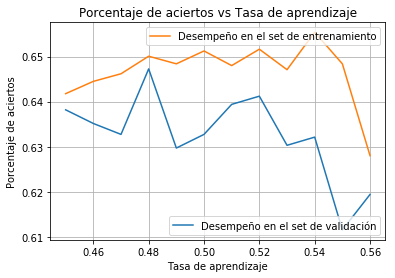

In [58]:
#plot
indice=pasosh.index(MejorUmbral)
print('Mejor umbral de selección obtenido: ',MejorUmbral)
print('Mejor porcentaje de aciertos obtenido en el set de entrenamiento: ',max(CalificacionesTrain))
print('Mejor porcentaje de aciertos obtenido en el set de validación: ',max(CalificacionesCV))
validacion,=plt.plot(pasosh,CalificacionesCV[1:len(CalificacionesCV)],label='Desempeño en el set de validación')
entreno,=plt.plot(pasosh,CalificacionesTrain[1:len(CalificacionesTrain)],label='Desempeño en el set de entrenamiento')
plt.title('Porcentaje de aciertos vs Tasa de aprendizaje')
plt.xlabel('Tasa de aprendizaje')
plt.ylabel('Porcentaje de aciertos')
first_leg=plt.legend(handles=[entreno],loc='upper right')
ax=plt.gca().add_artist(first_leg)
plt.legend(handles=[validacion],loc='lower right')
plt.grid()
plt.show()

### Mejor modelo encontrado
Para entrenar al modelo final se utilizó la sintonización de los hyperparámetros realizada anteriormente. 

Cost after epoch 0: 0.948773
Cost after epoch 5: 0.788445
Cost after epoch 10: 0.695477
Cost after epoch 15: 0.682595
Cost after epoch 20: 0.671807
Cost after epoch 25: 0.659159
Cost after epoch 30: 0.662735
Cost after epoch 35: 0.658314
Cost after epoch 40: 0.652716
Cost after epoch 45: 0.650140
Cost after epoch 50: 0.652091
Cost after epoch 55: 0.641134
Cost after epoch 60: 0.638684
Cost after epoch 65: 0.644902
Cost after epoch 70: 0.639361
Cost after epoch 75: 0.636800
Cost after epoch 80: 0.637960
Cost after epoch 85: 0.631052
Cost after epoch 90: 0.634403
Cost after epoch 95: 0.635677
Cost after epoch 100: 0.631282
Cost after epoch 105: 0.628978
Cost after epoch 110: 0.635114
Cost after epoch 115: 0.630695
Cost after epoch 120: 0.633726
Cost after epoch 125: 0.632322
Cost after epoch 130: 0.633128
Cost after epoch 135: 0.635127
Cost after epoch 140: 0.630614
Cost after epoch 145: 0.636312
Cost after epoch 150: 0.629161
Cost after epoch 155: 0.628041
Cost after epoch 160: 0.625210

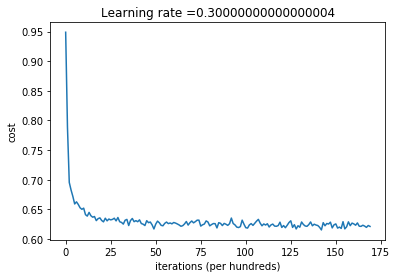

Resultados del mejor modelo en el set de entrenamiento: 
Porcentaje de aciertos:  0.6486556695674763


Recall,precision y valor-F del modelo
              precision    recall  f1-score   support

 partícula 1       0.67      0.53      0.59      3666
 partícula 2       0.64      0.76      0.69      4033

   micro avg       0.65      0.65      0.65      7699
   macro avg       0.65      0.64      0.64      7699
weighted avg       0.65      0.65      0.64      7699



Resultados del mejor modelo en el set de validación: 
Porcentaje de aciertos:  0.636969696969697


Recall,precision y valor-F del modelo
              precision    recall  f1-score   support

 partícula 1       0.67      0.51      0.57       800
 partícula 2       0.62      0.76      0.68       850

   micro avg       0.64      0.64      0.64      1650
   macro avg       0.64      0.63      0.63      1650
weighted avg       0.64      0.64      0.63      1650



Resultados del mejor modelo en el set de prueba: 
Porcentaje de 

In [157]:
layer_dims=dimensionesCapasEscondidas(MejorNn,MejorNc)
Xcv=np.transpose(np.array(Xcvw))
Xtrain=np.transpose(np.array(Xtrainw))
Xtest=np.transpose(np.array(Xtestw))
Ycv=Ycvw
Ytrain=Ytrainw
Ytest=Ytestw

parameters=L_layer_model(Xtrainw,Ytrainw,layer_dims,print_cost=True,learning_rate_type=learning_rate_type,num_epochs=850,keep_prob=Mejorkp,lambd=MejorLambda,learning_rate=MejorAlpha,decay_rate=MejorDecayRate,Opt_algorithm='adam')
    
outCV,cache=L_model_forward(Xcv,parameters,keep_prob=1)
outTrain,cache=L_model_forward(Xtrain,parameters,keep_prob=1)
outTest,cache=L_model_forward(Xtest,parameters,keep_prob=1)
    
predictCV=(outCV>MejorUmbral)*1
predictCV=np.transpose(predictCV)
scoreCV=mes.accuracy_score(Ycv,predictCV)
    
predictTrain=(outTrain>MejorUmbral)*1
predictTrain=np.transpose(predictTrain)
scoreTrain=mes.accuracy_score(Ytrain,predictTrain)
    
predictTest=(outTest>MejorUmbral)*1
predictTest=np.transpose(predictTest)
scoreTest=mes.accuracy_score(Ytest,predictTest)

print('Resultados del mejor modelo en el set de entrenamiento: ')
print('Porcentaje de aciertos: ', scoreTrain)
print('\n')
print('Recall,precision y valor-F del modelo')
print(classification_report(Ytrain,predictTrain,target_names=['partícula 1','partícula 2']))

print('\n')

print('Resultados del mejor modelo en el set de validación: ')
print('Porcentaje de aciertos: ', scoreCV)
print('\n')
print('Recall,precision y valor-F del modelo')
print(classification_report(Ycv,predictCV,target_names=['partícula 1','partícula 2']))

print('\n')

print('Resultados del mejor modelo en el set de prueba: ')
print('Porcentaje de aciertos: ', scoreTest)
print('\n')
print('Recall,precision y valor-F del modelo')
print(classification_report(Ytest,predictTest,target_names=['partícula 1','partícula 2']))
print('\n')
print('Parámetros utilizados para el mejor modelo: ')
print('Mejor tasa de aprendizaje: ',MejorAlpha)
print('Mejor tasa de decaimiento: ',MejorDecayRate)
print('Mejor Número de neuronas por capa: ',MejorNn)
print('Mejor Número de capas: ',MejorNc)
print('Mejor probabilidad de dejar neuronas vivas: ',Mejorkp)
print('Mejor parámetro de regularización L2: ',MejorLambda)
print('Mejor umbral de selección: ',MejorUmbral)

In [61]:
# parámetros "óptimos" de la red manual:
parameters

{'W1': array([[-1.46063926e+00, -7.79054350e-02,  1.05079943e-01,
          3.09920549e-01, -4.21001547e-01, -8.68471377e-01,
          1.61703353e-01,  2.13581261e-01, -3.39872984e-01,
         -1.05410288e-01,  1.79276641e-01,  6.13064485e-01,
         -1.29524050e+00, -2.99586536e-01, -8.19653870e-01,
         -8.95866570e-01, -2.50364877e-01, -7.74489074e-01,
         -6.16813843e-01, -1.04165363e+00, -3.20455252e-01,
         -6.63547638e-01, -1.17463227e+00,  3.22662190e-01,
         -1.45137809e+00, -1.77147653e-01, -1.69531796e-01,
          4.39591408e-01, -1.05286924e-01, -6.47295249e-01],
        [-2.00450985e-02,  5.85362750e-02,  5.24970415e-02,
          2.05459766e-01, -6.26774942e-01,  6.79788822e-01,
          3.45778410e-01, -2.73148168e-01,  6.70640808e-01,
         -8.73701829e-02,  3.05069636e-01, -5.02809745e-02,
          2.16668534e-01, -5.71787040e-01, -6.85804725e-01,
         -1.03034241e-01,  2.84772925e-01, -1.43774894e-01,
          3.78648620e-02, -5.7320

In [86]:
# predicción con XtestT (creación del archivo ytest con las predicciones)
XtestT=np.transpose(np.array(XtestT))
outTestT,cache=L_model_forward(XtestT,parameters,keep_prob=1)
predictTestT=(outTestT>MejorUmbral)*1
predictTestT=pd.DataFrame(np.transpose(predictTestT))
predictTestT.to_excel('ytest.xlsx')


### Verificación con librería SciKit-Learn

In [155]:
#sklearn
from sklearn.neural_network import MLPClassifier as MLP
classifier=MLP(hidden_layer_sizes=(16,),verbose=True,activation='relu',solver='adam',max_iter=800,alpha=0.001,learning_rate='constant', batch_size=64,tol=0.000001,validation_fraction=0)
classifier.fit(Xtrainw,np.array(np.transpose(Ytrainw))[0])
scoreTrain=classifier.score(Xtrainw,Ytrainw)
scoreCV=classifier.score(Xcvw,Ycvw)
print('Porcentaje de aciertos en el set de entrenamiento: ',scoreTrain)
print('Porcentaje de aciertos en el set de validación: ',scoreCV)

Iteration 1, loss = 0.75796242
Iteration 2, loss = 0.68301056
Iteration 3, loss = 0.66264614
Iteration 4, loss = 0.64984066
Iteration 5, loss = 0.64086046
Iteration 6, loss = 0.63413037
Iteration 7, loss = 0.62867687
Iteration 8, loss = 0.62470393
Iteration 9, loss = 0.62102590
Iteration 10, loss = 0.61787459
Iteration 11, loss = 0.61508038
Iteration 12, loss = 0.61254959
Iteration 13, loss = 0.61020213
Iteration 14, loss = 0.60792265
Iteration 15, loss = 0.60540479
Iteration 16, loss = 0.60349454
Iteration 17, loss = 0.60184643
Iteration 18, loss = 0.60010549
Iteration 19, loss = 0.59883477
Iteration 20, loss = 0.59654045
Iteration 21, loss = 0.59527094
Iteration 22, loss = 0.59400921
Iteration 23, loss = 0.59306216
Iteration 24, loss = 0.59119980
Iteration 25, loss = 0.58954008
Iteration 26, loss = 0.58878767
Iteration 27, loss = 0.58733003
Iteration 28, loss = 0.58670329
Iteration 29, loss = 0.58565395
Iteration 30, loss = 0.58472386
Iteration 31, loss = 0.58389803
Iteration 32, los

Iteration 259, loss = 0.53684403
Iteration 260, loss = 0.53654405
Iteration 261, loss = 0.53672258
Iteration 262, loss = 0.53659638
Iteration 263, loss = 0.53628118
Iteration 264, loss = 0.53607026
Iteration 265, loss = 0.53610431
Iteration 266, loss = 0.53682880
Iteration 267, loss = 0.53644992
Iteration 268, loss = 0.53552866
Iteration 269, loss = 0.53631371
Iteration 270, loss = 0.53688260
Iteration 271, loss = 0.53627587
Iteration 272, loss = 0.53591841
Iteration 273, loss = 0.53598811
Iteration 274, loss = 0.53558044
Iteration 275, loss = 0.53658361
Iteration 276, loss = 0.53653203
Iteration 277, loss = 0.53609789
Iteration 278, loss = 0.53592814
Iteration 279, loss = 0.53570479
Training loss did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Porcentaje de aciertos en el set de entrenamiento:  0.7290557215222756
Porcentaje de aciertos en el set de validación:  0.66


In [117]:
# parámetros "óptimos" de la red con librería:
classifier.coefs_

[array([[ 1.08723310e-01,  9.59453462e-02, -6.88750852e-01,
         -4.52152628e-01, -1.09153758e-01, -2.11741195e-01,
          1.16145199e-01, -1.75228276e-01,  3.12157580e-01,
         -7.77740101e-01, -9.69680970e-01],
        [ 1.40606987e-01, -2.52052976e-01, -2.16152640e-01,
          8.50272572e-02,  2.53888693e-01, -1.90328188e-01,
         -4.15900922e-01,  1.34048206e-01,  2.72393175e-01,
          1.58776928e-01, -8.20009719e-02],
        [-4.11732053e-02,  2.67236955e-01, -4.16717439e-01,
          2.15490842e-01,  2.20329976e-02, -2.32998600e-01,
          8.54999556e-01,  3.67200088e-01,  4.76975803e-01,
          4.75100744e-01, -8.51424015e-01],
        [-5.06866449e-02, -7.77892505e-02, -3.39021548e-01,
          4.59124358e-02,  5.23593129e-03, -3.15503743e-01,
         -2.29198992e-01,  2.87291870e-01,  1.26585744e-01,
         -1.68415217e-01,  3.03965043e-01],
        [ 2.08060044e-01, -8.25061927e-02, -3.94810222e-01,
          7.95575340e-03, -2.55446569e-02, -

### Conclusiones
Estimativo del error en datos de prueba:
$$
P(\epsilon)=0.35\% \pm 1
$$

Finalmente, se puede evidenciar que el modelo hallado tiene un promedio en el porcentaje de aciertos cercano al 65%, esto para los tres sets de datos utilizados (entrenamiento,validación y prueba). De allí, se puede concluir que el modelo no se ha sobreajustado a los datos ya que presenta porcentajes similares en los tres sets nombrados anteriormente. Se pudo comprobar, que para 3 capas cada una con 16 neuronas el modelo comenzaba a sobreajustarse presentando porcentajes de error alrededor del 84%-85% en el set de entrenamiento, mientras que en el set de validación optenía 58%-59%.

Por último, se halló el error asociado a la prueba del modelo: 

$$\epsilon=\sqrt{\frac{log(\frac{2}{\delta})}{2n}}$$
$$\epsilon=\sqrt{\frac{log(\frac{2}{0.05})}{2*1650}}$$
$$ \epsilon=3.34\%$$

Este error representa la posibilidad de que la estimación que hagó de mi modelo sea erronea. Teniendo en cuenta que, para una confianza del 95% la probabilidad de error de la estimación es de 3.34%, se puede afirmar que la estimación del error de prueba del modelo está muy cerca de su valor real en la mayoría de los casos. 

Por otro lado, con el fin de probar las diferencias entre la implementación "manual" y la implementación que ofrece la librería ***SciKit-Learn***, se probarón varios modelos creados con el módulo ***MLPClassifier*** y se analizó las diferencias entre los parámetros encontrados por las dos implementaciones, de igual forma se observaron las diferencias en el descenso sobre la función de costo. Se evidenció, que los pesos de los dos modelos presentan rangos y valores muy cercanos, así como también lo hacen sus sesgos ó biases. Sin embargo, la implementación con librería ofrece un mejor descenso de gradiente sobre la función de costo, llegando a valores de 0.3-0.4 sin sobreajustar la red a los ejemplos de entrenamiento, mientras qué con la implementación manual, sin importar los cambios que se hicieran, no se logró obtener valores por debajo del 0.51 en la función de costo. Es posible, que la librería implemente métodos o funciones adicionales(aparte de adam) que ayuden al descenso de gradiente y eviten que la función de costo se quede estancada en mínimos espúreos. 

El mejor desempeño encontrado al utilizar los modelos de la librería ***SciKit-Learn*** fue del 0.69% en el porcentaje de aciertos. A pesar de que la función de costo implementada por el método "manual" no lográ descender a más de 0.51, la diferencia entre el desempeño del mejor modelo hallado con la librería y el mejor modelo hallado con el método manual no es muy grande, siendo tan solo del 5%-4%.

En cuanto al preprocesamiento de los datos, después de probar varias veces con los 4 tipos de preprocesamiento que ofrece la función ***preprocesing***, se halló que el modelo tenía el mejor desempeño cuando se aplicaba un preprocesamiento robusto a los datos. Se presume que esto se debe a que varias columnas de la matriz de datos original eran dispersas y a que el data set original traía una cantidad de outliers significativa para el problema. Por lo cual, un tipo de preprocesamiento como el preprocesamiento robusto que no se ve afectado en gran manera por la presencia de datos ruidosos o excepcionales(outliers) es ideal para este problema. 

Con lo referido a PCA, se puedo observar que el mejor desempeño de la red al preprocesar los datos con PCA fue cuando se conservaban entre 25 y 28 variables lo cual hace referencia a aproximadamente el 98% de la varianza total de la base de datos. Sin embargo, el mejor resultado obtenido con PCA era del 62%-63% lo cual es peor que el hallado con la implementación robusta por un 3% en el porcentaje de aciertos.

Normalizar ofrecía desempeños cercanos a los encontrados con la implementación robusta, y estandarizar no obtuvo desempeños superiores al 59% sin importar cuan complejo o simple fuese el modelo hallado.

Además, se intento aplicar técnicas de secuencial hacia atrás y hacia adelante, pero ninguna de éstas logro superar el desempeño del modelo creado al entrenar con el set de datos completo(conservando todas las variables). Así mismo, se intento adicionar variables al sistema utilizando métodos como ***polinomial features*** (que consiste en agregar nuevas columnas que representen multiplicaciones entre las columnas de la matriz ó columnas de la matriz elevadas a alguna potencia) y métodos basados en ***kernels***. Sin embargo, ninguna de estas técnicas produjo méjores resultados que los obtenidos con el set de datos completo. 

Por último, el algoritmo de óptimización utilizado durante el entrenamiento de la red fue Adam ya que este presentaba mejores resultados tanto en tiempo de ejecución como en ajuste de los pesos de la red a comparación de los resultados obtenidos con descenso de gradiente estocástico.  Por otro lado, se probaron diferentes funciones de activación para las capas escondidas y para la capa de salida, llegando al final a la misma conclusión que en el reto 6; la mejor función de activación para las capas escondidas es la función ***ReLu*** ,y para la capa de salida la función con el mejor desempeño fue la función ***sigmoide*** o de sigmoid. 